In [1]:
%cd ../../..

/workspaces/Code


In [2]:
%matplotlib inline

from __future__ import annotations
from dataclasses import dataclass
import os
import gc
import tensorflow as tf

from Training import NewDataModelTrainer
from ModelBuilders import TestEfficientNetB0Builder, TestMobileNetBuilder, TestVgg16NetBuilder, ModelOptions
from itertools import product

/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
@dataclass
class ModelNN:
    modelNN: int
    trainable_froms: list[int]

@dataclass
class BuilderTests:
    def __init__(self, 
        ingest_denses: list[int],
        output_denses: list[int],
        modelNNs: list[ModelNN],
        epochs_list: list[int],
        batch_list: list[int],
        builder_label: str):

        self.ingest_denses = ingest_denses
        self.output_denses = output_denses
        self.modelNNs = modelNNs
        self.epochs_list = epochs_list
        self.batch_list = batch_list

        self.builder_label = builder_label
        
    def generate_options(self):
        tests = product(self.ingest_denses, self.output_denses, self.modelNNs, self.epochs_list, self.batch_list)

        for ingest_dense, output_dense, modellNN, epochs, batch_size in tests:
            for trainable_from in modellNN.trainable_froms:
                if trainable_from > modellNN.modelNN:
                    continue

                yield ModelOptions(
                    builder_label=self.builder_label,
                    model_nn=modellNN.modelNN,
                    ingest_dense=ingest_dense,
                    output_dense=output_dense,
                    trainable_from_index=trainable_from,
                    epochs=epochs,
                    batch_size=batch_size)


In [4]:
def run_mobile_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

    def enable_gpu_memory_growth():
        """
        Enables memory growth mode for GPUs.
        """
        gpus = tf.config.experimental.list_physical_devices('GPU')
        assert len(gpus) > 0, "No GPUs detected!"
                
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    enable_gpu_memory_growth()

    model_builder = TestMobileNetBuilder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

In [5]:
tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(35, [35, 24, 0]),
        ModelNN(54, [54, 35, 0]),
        ModelNN(72, [72, 60, 35, 0]),
    ],
    epochs_list=[6],
    batch_list=[16], # Try later with 8
    builder_label="Experimental/NewTraining/MobileNet")

for test in tests.generate_options():
    print(test.representation())

nn35-train35-id64-od8-e6-b16
nn35-train24-id64-od8-e6-b16
nn35-train0-id64-od8-e6-b16
nn54-train54-id64-od8-e6-b16
nn54-train35-id64-od8-e6-b16
nn54-train0-id64-od8-e6-b16
nn72-train72-id64-od8-e6-b16
nn72-train60-id64-od8-e6-b16
nn72-train35-id64-od8-e6-b16
nn72-train0-id64-od8-e6-b16


Now testing... Experimental/NewTraining/MobileNet nn35-train35-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn35-train24-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn35-train0-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn54-train54-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0450 - pd: 0.8088 - nd: 1.3929
Epoch 1: val_loss improved from inf to 0.01828, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weig

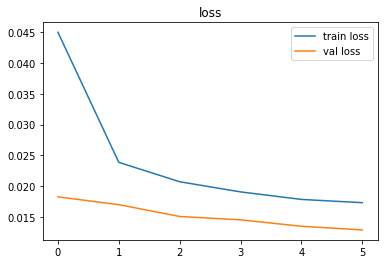

Calculating training stats...
10290/10290 [==============================] - 25s 2ms/step
(10, 3, 224, 224, 3)


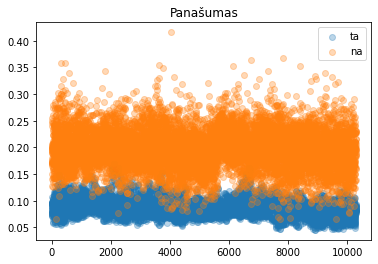

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:00<00:00,  6.02s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:06<00:00,  3.26it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn54-train35-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0095 - pd: 0.7361 - nd: 1.4299
Epoch 1: val_loss improved from inf to 0.00503, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weights.best.hdf5
2172/2172 [==============================] - 84s 37ms/step - loss: 0.0095 - pd: 0.7361 - nd: 1.4299 - val_loss: 0.0050 - val_pd: 0.5670 - val_nd: 1.3658 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0021 - pd: 0.6963 - nd: 1.4289
Epoch 2: val_loss did not improve from 0.00503
2172/2172 [==============================] - 82s 38ms/step - loss: 0.0021 - pd: 0.6963 - nd: 1.4289 - val_loss: 0.0059 - val_pd: 0.5928 - val_nd: 1.3576 - lr: 0.0010
Epoch 3/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0013 - pd: 0.6963 - nd: 1.4288
Epo

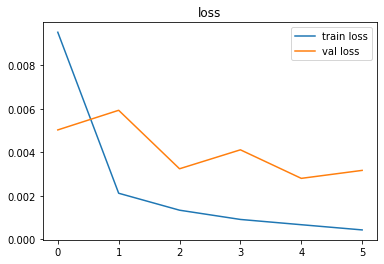

Calculating training stats...
10290/10290 [==============================] - 26s 2ms/step
(10, 3, 224, 224, 3)


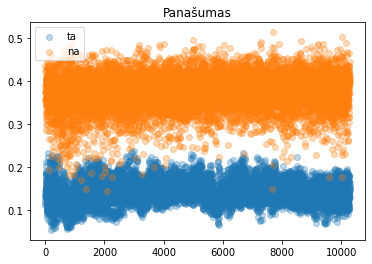

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:02<00:00,  6.10s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:01<00:00,  3.31it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn54-train0-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0027 - pd: 0.6872 - nd: 1.4249
Epoch 1: val_loss improved from inf to 0.00081, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weights.best.hdf5
2172/2172 [==============================] - 347s 159ms/step - loss: 0.0027 - pd: 0.6872 - nd: 1.4249 - val_loss: 8.0843e-04 - val_pd: 0.5041 - val_nd: 1.3915 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 5.9034e-04 - pd: 0.6245 - nd: 1.4158
Epoch 2: val_loss did not improve from 0.00081
2172/2172 [==============================] - 345s 159ms/step - loss: 5.9034e-04 - pd: 0.6245 - nd: 1.4158 - val_loss: 0.0013 - val_pd: 0.4642 - val_nd: 1.3180 - lr: 0.0010
Epoch 3/6
2172/2172 [==============================] - ETA: 0s - loss: 2.8527e-04 - pd: 0.60

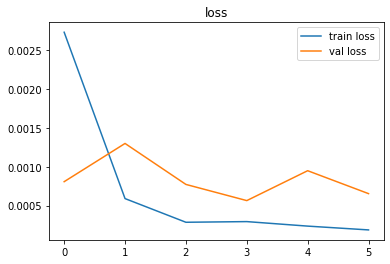

Calculating training stats...
10290/10290 [==============================] - 25s 2ms/step
(10, 3, 224, 224, 3)


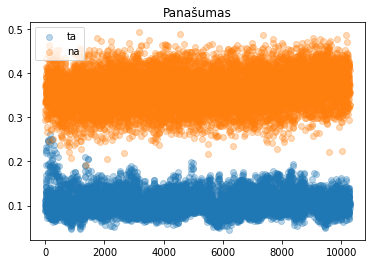

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:00<00:00,  6.04s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:05<00:00,  3.27it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn72-train72-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0687 - pd: 0.8397 - nd: 1.3805
Epoch 1: val_loss improved from inf to 0.03516, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weights.best.hdf5
2172/2172 [==============================] - 75s 34ms/step - loss: 0.0687 - pd: 0.8397 - nd: 1.3805 - val_loss: 0.0352 - val_pd: 0.7051 - val_nd: 1.3602 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0367 - pd: 0.7825 - nd: 1.3909
Epoch 2: val_loss improved from 0.03516 to 0.02950, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weights.best.hdf5
2172/2172 [==============================] - 73s 34ms/step - loss: 0.0367 - pd: 0.7824 - nd: 1.3909 - val_loss: 0.0295 - val_pd: 0.6990 - val_nd: 1.3598 - lr: 0.0010
Epoch

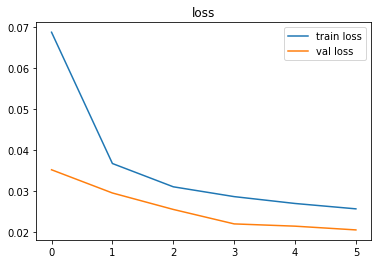

Calculating training stats...
10290/10290 [==============================] - 28s 3ms/step
(10, 3, 224, 224, 3)


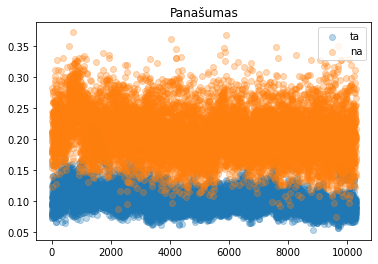

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:02<00:00,  6.10s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:01<00:00,  3.32it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn72-train60-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0165 - pd: 0.7473 - nd: 1.4251
Epoch 1: val_loss improved from inf to 0.01412, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weights.best.hdf5
2172/2172 [==============================] - 89s 39ms/step - loss: 0.0165 - pd: 0.7473 - nd: 1.4251 - val_loss: 0.0141 - val_pd: 0.6271 - val_nd: 1.3461 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0052 - pd: 0.7112 - nd: 1.4303
Epoch 2: val_loss did not improve from 0.01412
2172/2172 [==============================] - 87s 40ms/step - loss: 0.0052 - pd: 0.7112 - nd: 1.4303 - val_loss: 0.0144 - val_pd: 0.6661 - val_nd: 1.3467 - lr: 0.0010
Epoch 3/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0030 - pd: 0.7030 - nd: 1.4308
Epo

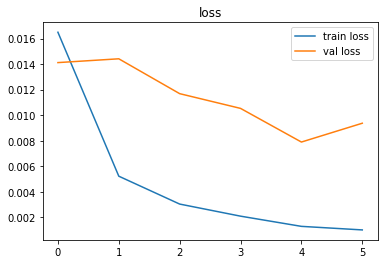

Calculating training stats...
10290/10290 [==============================] - 28s 3ms/step
(10, 3, 224, 224, 3)


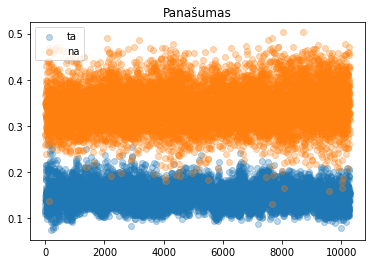

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:01<00:00,  6.10s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:11<00:00,  3.21it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn72-train35-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0082 - pd: 0.7087 - nd: 1.4310
Epoch 1: val_loss improved from inf to 0.01332, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weights.best.hdf5
2172/2172 [==============================] - 116s 51ms/step - loss: 0.0082 - pd: 0.7087 - nd: 1.4310 - val_loss: 0.0133 - val_pd: 0.5277 - val_nd: 1.2981 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0022 - pd: 0.6633 - nd: 1.4273
Epoch 2: val_loss improved from 0.01332 to 0.00430, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weights.best.hdf5
2172/2172 [==============================] - 111s 51ms/step - loss: 0.0022 - pd: 0.6633 - nd: 1.4273 - val_loss: 0.0043 - val_pd: 0.5292 - val_nd: 1.3495 - lr: 0.0010
Epo

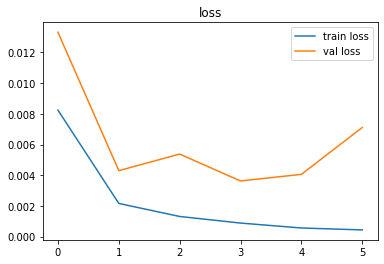

Calculating training stats...
10290/10290 [==============================] - 28s 3ms/step
(10, 3, 224, 224, 3)


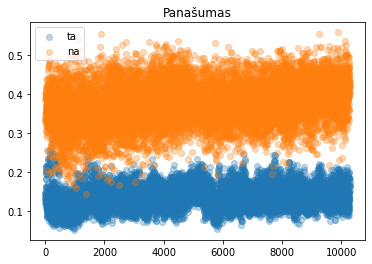

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:01<00:00,  6.10s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:04<00:00,  3.28it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/MobileNet nn72-train0-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0038 - pd: 0.6494 - nd: 1.4238
Epoch 1: val_loss improved from inf to 0.00091, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/MobileNet/weights.best.hdf5
2172/2172 [==============================] - 371s 169ms/step - loss: 0.0038 - pd: 0.6494 - nd: 1.4238 - val_loss: 9.0559e-04 - val_pd: 0.4742 - val_nd: 1.3750 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 8.0459e-04 - pd: 0.5930 - nd: 1.4153
Epoch 2: val_loss did not improve from 0.00091
2172/2172 [==============================] - 364s 167ms/step - loss: 8.0459e-04 - pd: 0.5930 - nd: 1.4153 - val_loss: 0.0015 - val_pd: 0.4737 - val_nd: 1.3618 - lr: 0.0010
Epoch 3/6
2172/2172 [==============================] - ETA: 0s - loss: 6.0674e-04 - pd: 0.58

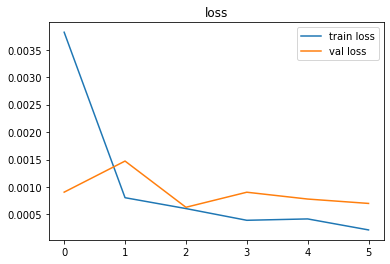

Calculating training stats...
10290/10290 [==============================] - 29s 3ms/step
(10, 3, 224, 224, 3)


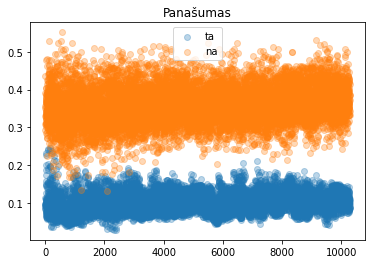

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:03<00:00,  6.18s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:07<00:00,  3.25it/s]



--------------------------------------------------------------------------------


In [6]:
import multiprocessing

for options in tests.generate_options():
    p1 = multiprocessing.Process(target=run_mobile_net, args=[options])

    p1.start()
    p1.join()

In [7]:
def run_mobilenet_nomarlly():
    for options in tests.generate_options():
        model_builder = TestMobileNetBuilder(options)

        model_trainer = NewDataModelTrainer()

        model_trainer.run(model_builder)

        tf.keras.backend.clear_session()
        gc.collect()
        print("-" * 80)

# run_mobilenet_nomarlly()

In [8]:
tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(30, [0, 19, 30]), 
        ModelNN(71, [0, 30, 71]), 
        ModelNN(254, [254]), # do 0 later
        ModelNN(251, [251]), # do 0 later
        ModelNN(140, [140, 71]),
    ],
    epochs_list=[6],
    batch_list=[16],
    builder_label="Experimental/NewTraining/EfficientNetV2B0")

for test in tests.generate_options():
    print(test.representation())

nn30-train0-id64-od8-e6-b16
nn30-train19-id64-od8-e6-b16
nn30-train30-id64-od8-e6-b16
nn71-train0-id64-od8-e6-b16
nn71-train30-id64-od8-e6-b16
nn71-train71-id64-od8-e6-b16
nn254-train254-id64-od8-e6-b16
nn251-train251-id64-od8-e6-b16
nn140-train140-id64-od8-e6-b16
nn140-train71-id64-od8-e6-b16


In [9]:
def run_efficient_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

    def enable_gpu_memory_growth():
        """
        Enables memory growth mode for GPUs.
        """
        gpus = tf.config.experimental.list_physical_devices('GPU')
        assert len(gpus) > 0, "No GPUs detected!"
                
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    enable_gpu_memory_growth()

    model_builder = TestEfficientNetB0Builder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

Now testing... Experimental/NewTraining/EfficientNetV2B0 nn30-train0-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn30-train19-id64-od8-e6-b16
Experiments already complete. Remove the '.complete' file for re-run
--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn30-train30-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0300 - pd: 0.7969 - nd: 1.4051
Epoch 1: val_loss improved from inf to 0.01059, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 48s 21ms/step - loss: 0.0300 - pd: 0.7969 - nd: 1.4051 - val_loss: 0.0106 - val_pd: 0.6226 - val_nd: 1.3114 - lr: 0.0010
Epoch 2/6
2171/2172 [

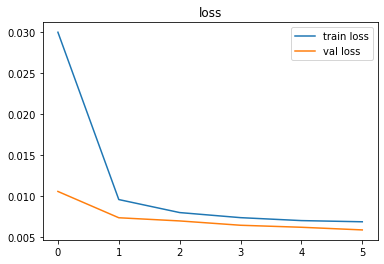

Calculating training stats...
10290/10290 [==============================] - 20s 2ms/step
(10, 3, 224, 224, 3)


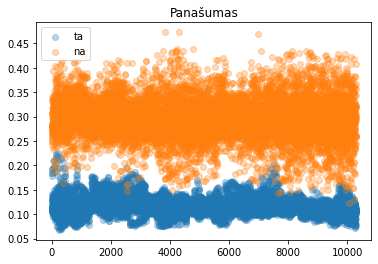

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:06<00:00,  6.30s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [08:36<00:00,  1.94it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn71-train0-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0053 - pd: 0.7030 - nd: 1.4419
Epoch 1: val_loss improved from inf to 0.00565, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 161s 73ms/step - loss: 0.0053 - pd: 0.7030 - nd: 1.4419 - val_loss: 0.0056 - val_pd: 0.5773 - val_nd: 1.3583 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 7.8014e-04 - pd: 0.6468 - nd: 1.4286
Epoch 2: val_loss improved from 0.00565 to 0.00154, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 159s 73ms/step - loss: 7.8014e-04 - pd: 0.6468 - nd: 1.4286 - val_loss: 0.0015 - val_pd: 0.5313 - val

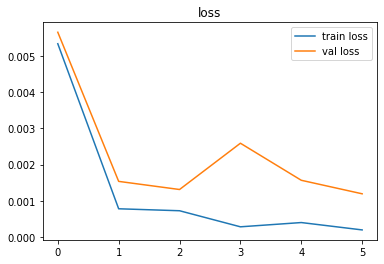

Calculating training stats...
10290/10290 [==============================] - 30s 3ms/step
(10, 3, 224, 224, 3)


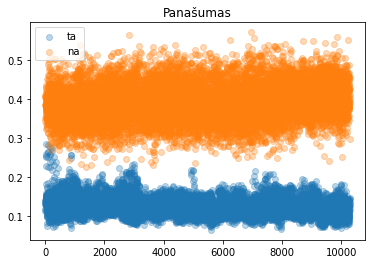

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:07<00:00,  6.36s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:09<00:00,  3.24it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn71-train30-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0056 - pd: 0.7078 - nd: 1.4487
Epoch 1: val_loss improved from inf to 0.00428, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 83s 37ms/step - loss: 0.0056 - pd: 0.7078 - nd: 1.4487 - val_loss: 0.0043 - val_pd: 0.5205 - val_nd: 1.3136 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 4.5970e-04 - pd: 0.6534 - nd: 1.4397
Epoch 2: val_loss improved from 0.00428 to 0.00296, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 80s 37ms/step - loss: 4.5954e-04 - pd: 0.6534 - nd: 1.4396 - val_loss: 0.0030 - val_pd: 0.4891 - val_

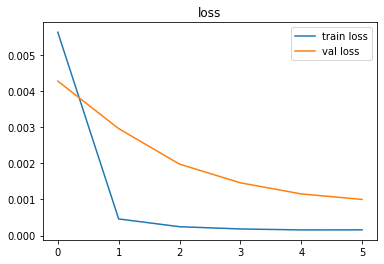

Calculating training stats...
10290/10290 [==============================] - 27s 3ms/step
(10, 3, 224, 224, 3)


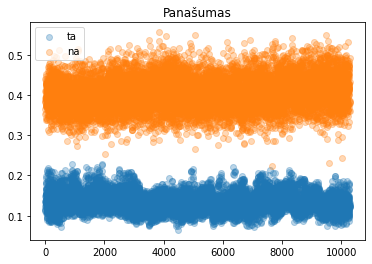

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:06<00:00,  6.34s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:02<00:00,  3.30it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn71-train71-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0173 - pd: 0.7357 - nd: 1.4031
Epoch 1: val_loss improved from inf to 0.00357, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 57s 25ms/step - loss: 0.0173 - pd: 0.7357 - nd: 1.4031 - val_loss: 0.0036 - val_pd: 0.5102 - val_nd: 1.3240 - lr: 0.0010
Epoch 2/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0031 - pd: 0.6723 - nd: 1.3987
Epoch 2: val_loss improved from 0.00357 to 0.00229, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 54s 25ms/step - loss: 0.0031 - pd: 0.6723 - nd: 1.3987 - val_loss: 0.0023 - val_pd: 0.5205 - val_nd: 1.34

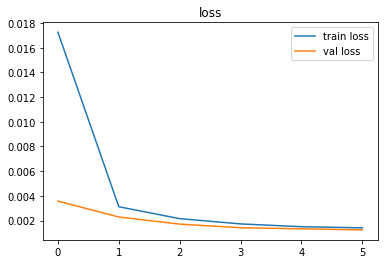

Calculating training stats...
10290/10290 [==============================] - 27s 3ms/step
(10, 3, 224, 224, 3)


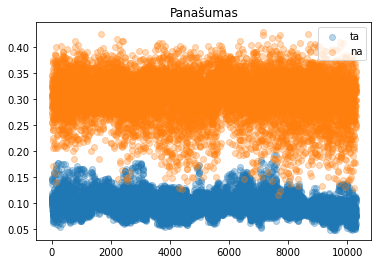

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:07<00:00,  6.37s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:01<00:00,  3.31it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn254-train254-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0110 - pd: 0.7016 - nd: 1.4089
Epoch 1: val_loss improved from inf to 0.00219, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 116s 51ms/step - loss: 0.0110 - pd: 0.7016 - nd: 1.4089 - val_loss: 0.0022 - val_pd: 0.5145 - val_nd: 1.3697 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0028 - pd: 0.6600 - nd: 1.4093
Epoch 2: val_loss improved from 0.00219 to 0.00176, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 111s 51ms/step - loss: 0.0028 - pd: 0.6600 - nd: 1.4093 - val_loss: 0.0018 - val_pd: 0.5142 - val_nd: 

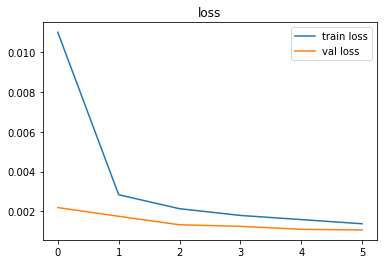

Calculating training stats...
10290/10290 [==============================] - 88s 8ms/step
(10, 3, 224, 224, 3)


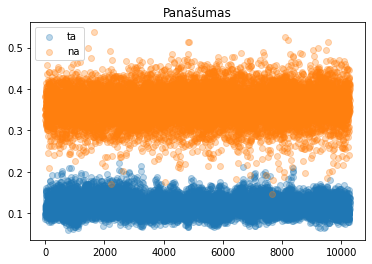

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:18<00:00,  6.94s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [04:10<00:00,  4.00it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn251-train251-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0186 - pd: 0.6861 - nd: 1.4027
Epoch 1: val_loss improved from inf to 0.00389, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 113s 50ms/step - loss: 0.0186 - pd: 0.6861 - nd: 1.4027 - val_loss: 0.0039 - val_pd: 0.4820 - val_nd: 1.3458 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0049 - pd: 0.6404 - nd: 1.4077
Epoch 2: val_loss improved from 0.00389 to 0.00243, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 108s 50ms/step - loss: 0.0049 - pd: 0.6405 - nd: 1.4077 - val_loss: 0.0024 - val_pd: 0.4801 - val_nd: 

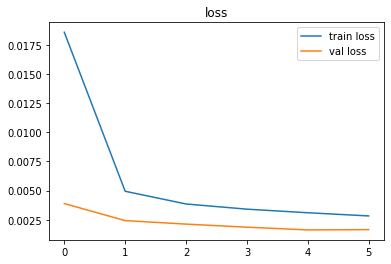

Calculating training stats...
10290/10290 [==============================] - 83s 8ms/step
(10, 3, 224, 224, 3)


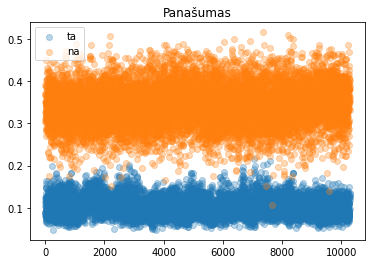

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:16<00:00,  6.81s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [04:10<00:00,  3.99it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn140-train140-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0148 - pd: 0.6986 - nd: 1.4023
Epoch 1: val_loss improved from inf to 0.00327, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 85s 38ms/step - loss: 0.0148 - pd: 0.6986 - nd: 1.4023 - val_loss: 0.0033 - val_pd: 0.5687 - val_nd: 1.3489 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 0.0031 - pd: 0.6478 - nd: 1.4049
Epoch 2: val_loss improved from 0.00327 to 0.00261, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 83s 38ms/step - loss: 0.0031 - pd: 0.6478 - nd: 1.4050 - val_loss: 0.0026 - val_pd: 0.5682 - val_nd: 1.

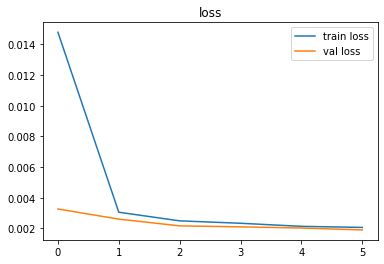

Calculating training stats...
10290/10290 [==============================] - 53s 5ms/step
(10, 3, 224, 224, 3)


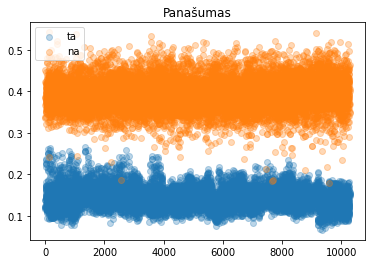

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:10<00:00,  6.54s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:04<00:00,  3.29it/s]



--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/EfficientNetV2B0 nn140-train71-id64-od8-e6-b16
Epoch 1/6
2172/2172 [==============================] - ETA: 0s - loss: 0.0040 - pd: 0.6994 - nd: 1.4345
Epoch 1: val_loss improved from inf to 0.00234, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 153s 69ms/step - loss: 0.0040 - pd: 0.6994 - nd: 1.4345 - val_loss: 0.0023 - val_pd: 0.5290 - val_nd: 1.3465 - lr: 0.0010
Epoch 2/6
2171/2172 [============================>.] - ETA: 0s - loss: 3.9415e-04 - pd: 0.6390 - nd: 1.4265
Epoch 2: val_loss improved from 0.00234 to 0.00166, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/EfficientNetV2B0/weights.best.hdf5
2172/2172 [==============================] - 149s 69ms/step - loss: 3.9402e-04 - pd: 0.6389 - nd: 1.4265 - val_loss: 0.0017 - val_pd: 0.4869 - v

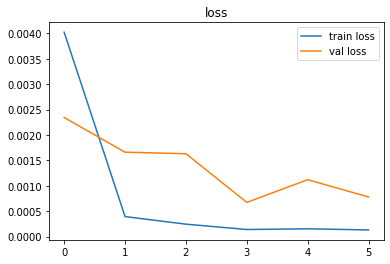

Calculating training stats...
10290/10290 [==============================] - 48s 5ms/step
(10, 3, 224, 224, 3)


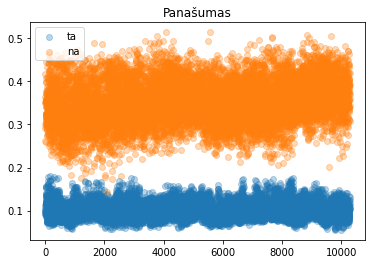

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:10<00:00,  6.54s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Processing recall locations: 100%|██████████| 1000/1000 [05:03<00:00,  3.29it/s]



--------------------------------------------------------------------------------


In [10]:
import multiprocessing

for options in tests.generate_options():
    p1 = multiprocessing.Process(target=run_efficient_net, args=[options])

    p1.start()
    p1.join()

In [11]:
tests = BuilderTests(
    ingest_denses=[64],
    output_denses=[8],
    modelNNs=[
        ModelNN(18, [18]), 
        ModelNN(14, [14]), 
        ModelNN(10, [10]),
    ],
    epochs_list=[6],
    batch_list=[4],
    builder_label="Experimental/NewTraining/VGG16")

for test in tests.generate_options():
    print(test.representation())

nn18-train18-id64-od8-e6-b4
nn14-train14-id64-od8-e6-b4
nn10-train10-id64-od8-e6-b4


In [12]:
def run_vgg16_net(options):
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

    def enable_gpu_memory_growth():
        """
        Enables memory growth mode for GPUs.
        """
        gpus = tf.config.experimental.list_physical_devices('GPU')
        assert len(gpus) > 0, "No GPUs detected!"
                
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    enable_gpu_memory_growth()

    model_builder = TestVgg16NetBuilder(options)
    model_trainer = NewDataModelTrainer()

    model_trainer.run(model_builder)

    tf.keras.backend.clear_session()
    gc.collect()
    print("-" * 80)

Now testing... Experimental/NewTraining/VGG16 nn18-train18-id64-od8-e6-b4
58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/6
8686/8687 [============================>.] - ETA: 0s - loss: 0.0224 - pd: 0.7346 - nd: 1.4069
Epoch 1: val_loss improved from inf to 0.01401, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/VGG16/weights.best.hdf5
8687/8687 [==============================] - 426s 49ms/step - loss: 0.0224 - pd: 0.7346 - nd: 1.4069 - val_loss: 0.0140 - val_pd: 0.5622 - val_nd: 1.3212 - lr: 0.0010
Epoch 2/6
8687/8687 [==============================] - ETA: 0s - loss: 0.0143 - pd: 0.7194 - nd: 1.4097
Epoch 2: val_loss improved from 0.01401 to 0.01220, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/VGG16/weights.best.hdf5
8687/8687 [==============================] - 425s 49ms/step - loss: 0.0143 - pd: 0.7194 - nd: 1.4097 - val_loss: 0.0122 - val_pd: 0.5649 - val_nd: 1.3277 - lr: 0.0010
Epoch 3/6
8687/8687 [============

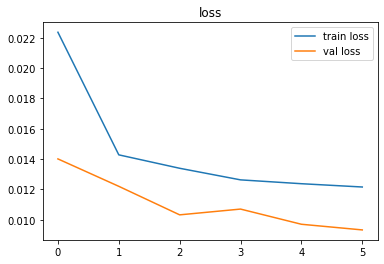

Calculating training stats...
10290/10290 [==============================] - 131s 13ms/step
(10, 3, 224, 224, 3)


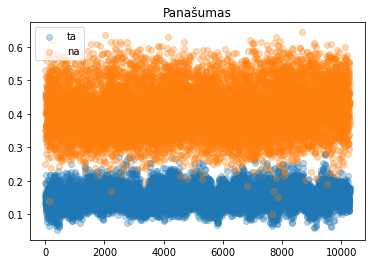

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:11<00:00,  6.58s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Creating recommendation db:   0%|          | 0/31 [00:00<?, ?it/s]2022-05-14 08:26:32.528898: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 08:26:32.532506: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 08:26:32.959347: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 08:26:32.95


--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/VGG16 nn14-train14-id64-od8-e6-b4
Epoch 1/6
8686/8687 [============================>.] - ETA: 0s - loss: 0.0190 - pd: 0.7465 - nd: 1.4074
Epoch 1: val_loss improved from inf to 0.00381, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/VGG16/weights.best.hdf5
8687/8687 [==============================] - 391s 45ms/step - loss: 0.0190 - pd: 0.7465 - nd: 1.4074 - val_loss: 0.0038 - val_pd: 0.5555 - val_nd: 1.3491 - lr: 0.0010
Epoch 2/6
8687/8687 [==============================] - ETA: 0s - loss: 0.0078 - pd: 0.7158 - nd: 1.4085
Epoch 2: val_loss improved from 0.00381 to 0.00303, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/VGG16/weights.best.hdf5
8687/8687 [==============================] - 390s 45ms/step - loss: 0.0078 - pd: 0.7158 - nd: 1.4085 - val_loss: 0.0030 - val_pd: 0.5615 - val_nd: 1.3503 - lr: 0.0010
Epoch 3/6
8687/8

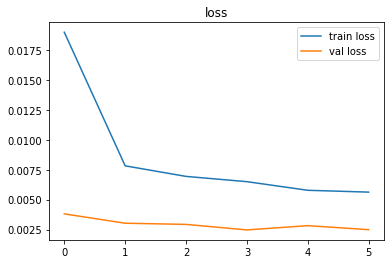

Calculating training stats...
10290/10290 [==============================] - 115s 11ms/step
(10, 3, 224, 224, 3)


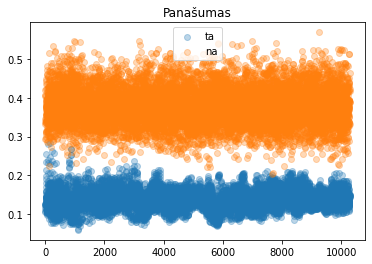

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:09<00:00,  6.50s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Creating recommendation db:   0%|          | 0/31 [00:00<?, ?it/s]2022-05-14 09:16:41.776001: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 09:16:41.777407: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 09:16:42.208277: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 09:16:42.20


--------------------------------------------------------------------------------
Now testing... Experimental/NewTraining/VGG16 nn10-train10-id64-od8-e6-b4
Epoch 1/6
8687/8687 [==============================] - ETA: 0s - loss: 0.0296 - pd: 0.8006 - nd: 1.4064
Epoch 1: val_loss improved from inf to 0.00998, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/VGG16/weights.best.hdf5
8687/8687 [==============================] - 313s 36ms/step - loss: 0.0296 - pd: 0.8006 - nd: 1.4064 - val_loss: 0.0100 - val_pd: 0.6241 - val_nd: 1.3734 - lr: 0.0010
Epoch 2/6
8687/8687 [==============================] - ETA: 0s - loss: 0.0157 - pd: 0.7585 - nd: 1.4081
Epoch 2: val_loss improved from 0.00998 to 0.00893, saving model to ModelBuilders/runtime_files/Experimental/NewTraining/VGG16/weights.best.hdf5
8687/8687 [==============================] - 314s 36ms/step - loss: 0.0157 - pd: 0.7585 - nd: 1.4081 - val_loss: 0.0089 - val_pd: 0.6017 - val_nd: 1.3541 - lr: 0.0010
Epoch 3/6
8687/8

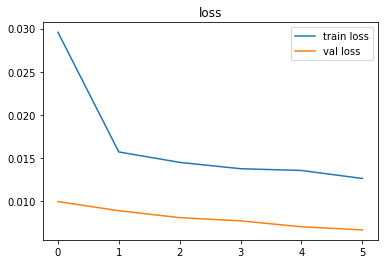

Calculating training stats...
10290/10290 [==============================] - 82s 8ms/step
(10, 3, 224, 224, 3)


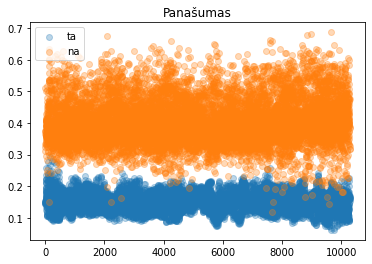

Saving sampled data..........
Loading image: City/NewCut/City_2017.jpg
Loading image: City/NewCut/City_2016.jpg
Running offset runner tests


Running point offsets: 100%|██████████| 20/20 [02:06<00:00,  6.31s/it]



Saving offset data
Loading image: City/NewTraining/ExperimentZone/City_2017.jpg
Loading image: City/NewTraining/ExperimentZone/City_2016.jpg


Creating recommendation db:   0%|          | 0/31 [00:00<?, ?it/s]2022-05-14 09:59:38.736115: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 09:59:38.737440: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 09:59:39.163398: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-14 09:59:39.16


--------------------------------------------------------------------------------


In [13]:
import multiprocessing

for options in tests.generate_options():
    p1 = multiprocessing.Process(target=run_vgg16_net, args=[options])

    p1.start()
    p1.join()